<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.163142,23.706410,39.089109,-1.280017,134.678644,135.873944,-1.195300
1,0.0,1.0,88.793628,25.168131,84.393391,0.497691,208.852841,208.118456,0.734385
2,0.0,2.0,50.158803,95.321964,37.880340,0.541116,193.902223,193.115854,0.786369
3,0.0,3.0,38.548157,45.813271,97.407545,1.160279,192.929253,191.888027,1.041226
4,0.0,4.0,47.893064,25.443633,38.271317,-1.274216,120.333799,121.641457,-1.307659
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.482545,53.436781,47.726975,1.864915,141.511216,139.720285,1.790931
249996,999.0,246.0,72.298680,51.259645,27.843049,0.222337,161.623711,161.661095,-0.037384
249997,999.0,247.0,93.332276,69.303552,71.037404,-2.986154,240.687078,243.885066,-3.197988
249998,999.0,248.0,50.355414,96.062621,99.445244,-3.174603,252.688677,256.028277,-3.339600


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.163142,23.706410,39.089109,-1.280017,134.678644,135.873944,-1.195300
1,0.0,1.0,88.793628,25.168131,84.393391,0.497691,208.852841,208.118456,0.734385
2,0.0,2.0,50.158803,95.321964,37.880340,0.541116,193.902223,193.115854,0.786369
3,0.0,3.0,38.548157,45.813271,97.407545,1.160279,192.929253,191.888027,1.041226
4,0.0,4.0,47.893064,25.443633,38.271317,-1.274216,120.333799,121.641457,-1.307659
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.482545,53.436781,47.726975,1.864915,141.511216,139.720285,1.790931
249996,999.0,246.0,72.298680,51.259645,27.843049,0.222337,161.623711,161.661095,-0.037384
249997,999.0,247.0,93.332276,69.303552,71.037404,-2.986154,240.687078,243.885066,-3.197988
249998,999.0,248.0,50.355414,96.062621,99.445244,-3.174603,252.688677,256.028277,-3.339600


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    63.163142  23.706410  39.089109  ...  134.678644  135.873944 -1.195300
      1.0    88.793628  25.168131  84.393391  ...  208.852841  208.118456  0.734385
      2.0    50.158803  95.321964  37.880340  ...  193.902223  193.115854  0.786369
      3.0    38.548157  45.813271  97.407545  ...  192.929253  191.888027  1.041226
      4.0    47.893064  25.443633  38.271317  ...  120.333799  121.641457 -1.307659
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  28.482545  53.436781  47.726975  ...  141.511216  139.720285  1.790931
      246.0  72.298680  51.259645  27.843049  ...  161.623711  161.661095 -0.037384
      247.0  93.332276  69.303552  71.037404  ...  240.687078  243.885066 -3.197988
      248.0  50.355414  96.062621  99.445244  ...  252.688677  256.028277 -3.339600
      249.0  79.883044  73.600998  41.262958  ...  203.283061  205.118098 -1.835037

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    63.163142  23.706410  39.089109  ...  134.678644  135.873944 -1.195300
      1.0    88.793628  25.168131  84.393391  ...  208.852841  208.118456  0.734385
      2.0    50.158803  95.321964  37.880340  ...  193.902223  193.115854  0.786369
      3.0    38.548157  45.813271  97.407545  ...  192.929253  191.888027  1.041226
      4.0    47.893064  25.443633  38.271317  ...  120.333799  121.641457 -1.307659
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  28.482545  53.436781  47.726975  ...  141.511216  139.720285  1.790931
      246.0  72.298680  51.259645  27.843049  ...  161.623711  161.661095 -0.037384
      247.0  93.332276  69.303552  71.037404  ...  240.687078  243.885066 -3.197988
      248.0  50.355414  96.062621  99.445244  ...  252.688677  256.028277 -3.339600
      249.0  79.883044  73.600998  41.262958  ...  203.283061  205.118098 -1.835037

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.163142,23.706410,39.089109,-1.280017,134.678644,135.873944,-1.195300
1,0.0,1.0,88.793628,25.168131,84.393391,0.497691,208.852841,208.118456,0.734385
2,0.0,2.0,50.158803,95.321964,37.880340,0.541116,193.902223,193.115854,0.786369
3,0.0,3.0,38.548157,45.813271,97.407545,1.160279,192.929253,191.888027,1.041226
4,0.0,4.0,47.893064,25.443633,38.271317,-1.274216,120.333799,121.641457,-1.307659
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.482545,53.436781,47.726975,1.864915,141.511216,139.720285,1.790931
249996,999.0,246.0,72.298680,51.259645,27.843049,0.222337,161.623711,161.661095,-0.037384
249997,999.0,247.0,93.332276,69.303552,71.037404,-2.986154,240.687078,243.885066,-3.197988
249998,999.0,248.0,50.355414,96.062621,99.445244,-3.174603,252.688677,256.028277,-3.339600


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    63.163142  23.706410  39.089109  ...  134.678644  135.873944 -1.195300
      1.0    88.793628  25.168131  84.393391  ...  208.852841  208.118456  0.734385
      2.0    50.158803  95.321964  37.880340  ...  193.902223  193.115854  0.786369
      3.0    38.548157  45.813271  97.407545  ...  192.929253  191.888027  1.041226
      4.0    47.893064  25.443633  38.271317  ...  120.333799  121.641457 -1.307659
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  28.482545  53.436781  47.726975  ...  141.511216  139.720285  1.790931
      246.0  72.298680  51.259645  27.843049  ...  161.623711  161.661095 -0.037384
      247.0  93.332276  69.303552  71.037404  ...  240.687078  243.885066 -3.197988
      248.0  50.355414  96.062621  99.445244  ...  252.688677  256.028277 -3.339600
      249.0  79.883044  73.600998  41.262958  ...  203.283061  205.118098 -1.835037

[250000 rows x 7 columns]

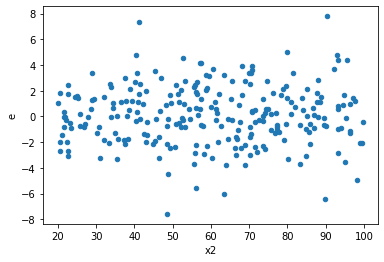

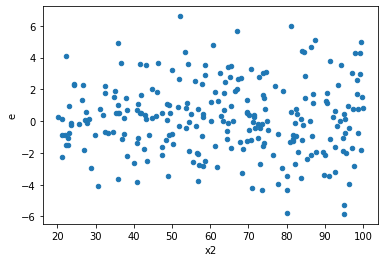

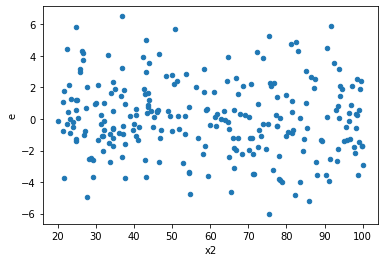

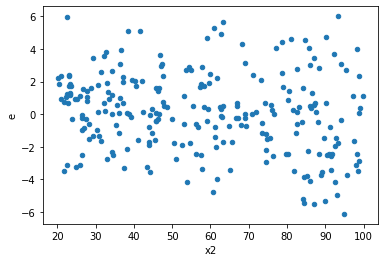

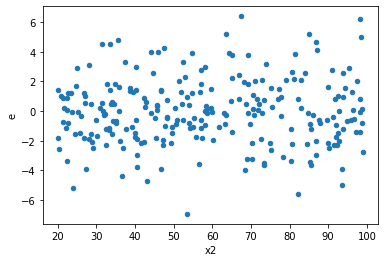

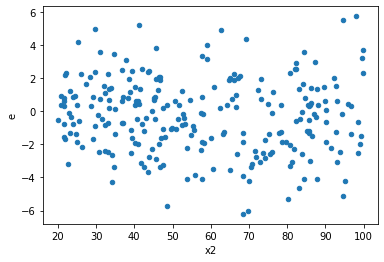

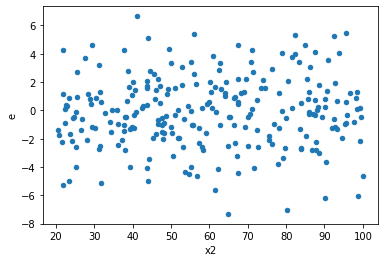

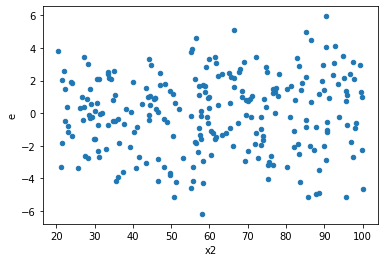

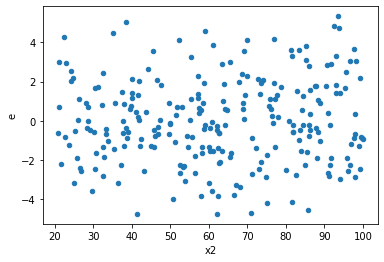

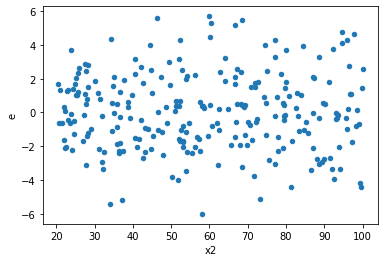

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,412.71129669044535,620.6053838634768,4.254755635983972,6.3979936480770805,1.503727639248418,0.04583923146163271,0.9770803842691836,0.022919615730816356,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,484.38166997056095,662.3549185440959,4.9936254636140305,6.828401222104081,1.3674235826974037,0.1250501631388834,0.9374749184305583,0.0625250815694417,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,522.9199746705472,601.7475840761697,5.390927573923166,6.2035833409914405,1.150745072332121,0.4905871506657036,0.7547064246671482,0.2452935753328518,Reject005=1 : Homoscedasticity
3.0,97.0,97.0,421.9088006026842,527.4596755927706,4.349575263945198,5.43772861435846,1.2501746226656332,0.27326293092812737,0.8633685345359363,0.13663146546406368,Reject005=1 : Homoscedasticity
4.0,97.0,97.0,439.69013252719134,646.1199021355523,4.532887964197849,6.661029918923219,1.4694892023659294,0.05945219524087042,0.9702739023795648,0.02972609762043521,Reject005=1 : Homoscedasticity
5.0,97.0,97.0,374.8055721940875,643.6261140790974,3.863974971073067,6.635320763702035,1.7172266418328626,0.008291523764176967,0.9958542381179115,0.004145761882088483,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,409.05681155276113,607.0935034206865,4.2170805314717645,6.258695911553469,1.4841300432479951,0.05322706085593065,0.9733864695720347,0.026613530427965326,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,433.8359305184103,625.6749139890452,4.472535366169178,6.450256845247889,1.44219247410282,0.07288716505174553,0.9635564174741272,0.036443582525872764,Reject005=1 : Homoscedasticity
9.0,97.0,97.0,458.1923279252426,625.1060450757299,4.723632246651985,6.444392217275565,1.364287455240238,0.1278321450712847,0.9360839274643576,0.06391607253564235,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,412.71129669044535,620.6053838634768,4.254755635983972,6.3979936480770805,1.503727639248418,0.04583923146163271,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,484.38166997056095,662.3549185440959,4.9936254636140305,6.828401222104081,1.3674235826974037,0.1250501631388834,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,522.9199746705472,601.7475840761697,5.390927573923166,6.2035833409914405,1.150745072332121,0.4905871506657036,Reject005=1 : Homoscedasticity
3.0,97.0,97.0,421.9088006026842,527.4596755927706,4.349575263945198,5.43772861435846,1.2501746226656332,0.27326293092812737,Reject005=1 : Homoscedasticity
4.0,97.0,97.0,439.69013252719134,646.1199021355523,4.532887964197849,6.661029918923219,1.4694892023659294,0.05945219524087042,Reject005=1 : Homoscedasticity
5.0,97.0,97.0,374.8055721940875,643.6261140790974,3.863974971073067,6.635320763702035,1.7172266418328626,0.008291523764176967,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,409.05681155276113,607.0935034206865,4.2170805314717645,6.258695911553469,1.4841300432479951,0.05322706085593065,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,540.410246346427,425.2848359316692,5.571239653055948,4.384379751872879,0.7869666402643349,0.23987185845737327,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,433.8359305184103,625.6749139890452,4.472535366169178,6.450256845247889,1.44219247410282,0.07288716505174553,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      618
Reject005=0 : Heteroscedasticity    382
Name: Result_test, dtype: int64